# Deep Learning - Nasir Hussain - 2021/01/30

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

2022-05-01 01:33:37.169229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-01 01:33:37.169260: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
X=df[['Height']].values
y_true=df[['Weight']].values

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
X[:5]

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       [71.7309784 ],
       [69.88179586]])

In [6]:
y_true[:5]

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       [220.0424703 ],
       [206.34980062]])

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

2022-05-01 01:34:34.838157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 01:34:34.838645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-01 01:34:34.838751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-01 01:34:34.838838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-01 01:34:34.838924: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

/home/hassan/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
model.fit(X,y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 1ms/step - loss: 1515.6935
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 575.7847
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 535.3175
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 503.2332
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 450.9585
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 421.4698
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 382.6892
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 373.5424
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 323.8326
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 291.2059
Epoch 11/40
313/313 [==============================] - 0s 983us/step - loss: 262.9496
Epoch 12/40
313/313 [==============================] - 0s 1ms/step - loss: 257.622

In [11]:
y_pred=model.predict(X)

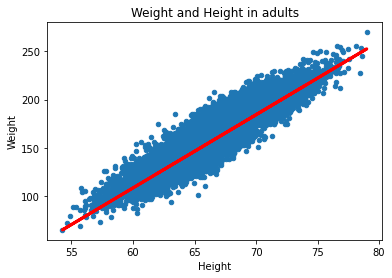

In [12]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='red', linewidth=3)

In [13]:
w,b=model.get_weights()

In [14]:
w

array([[7.605415]], dtype=float32)

In [15]:
b

array([-348.07745], dtype=float32)